In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , auc , roc_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , LabelEncoder , OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\Crop_Agriculture_Data_2.csv")
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,Kharif,Alluvial,Insecticides,0,0,0,Summer,Minimal Damage
1,F00000003,209,Kharif,Alluvial,Insecticides,0,0,0,Monsoon,Partial Damage
2,F00000004,257,Kharif,Alluvial,Insecticides,0,0,0,Monsoon,Partial Damage
3,F00000005,257,Kharif,Black-Cotton,Insecticides,0,0,0,Monsoon,Partial Damage
4,F00000006,342,Kharif,Alluvial,Insecticides,0,0,0,Monsoon,Partial Damage
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,Kharif,Alluvial,Herbicides,10,12,44,Winter,Minimal Damage
88854,F00155938,3516,Kharif,Alluvial,Herbicides,10,20,38,Summer,Minimal Damage
88855,F00155939,3516,Kharif,Alluvial,Herbicides,15,40,8,Monsoon,Minimal Damage
88856,F00155942,3702,Kharif,Alluvial,Herbicides,10,25,18,Winter,Minimal Damage


In [3]:
df.shape

(88858, 10)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [6]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [7]:
df.drop('ID' , axis=1 , inplace=True)

In [8]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,Kharif,Alluvial,Insecticides,0,0,0,Summer,Minimal Damage
1,209,Kharif,Alluvial,Insecticides,0,0,0,Monsoon,Partial Damage
2,257,Kharif,Alluvial,Insecticides,0,0,0,Monsoon,Partial Damage
3,257,Kharif,Black-Cotton,Insecticides,0,0,0,Monsoon,Partial Damage
4,342,Kharif,Alluvial,Insecticides,0,0,0,Monsoon,Partial Damage


In [9]:
df.duplicated().sum()

1227

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

<Axes: xlabel='Estimated_Insects_Count', ylabel='Density'>

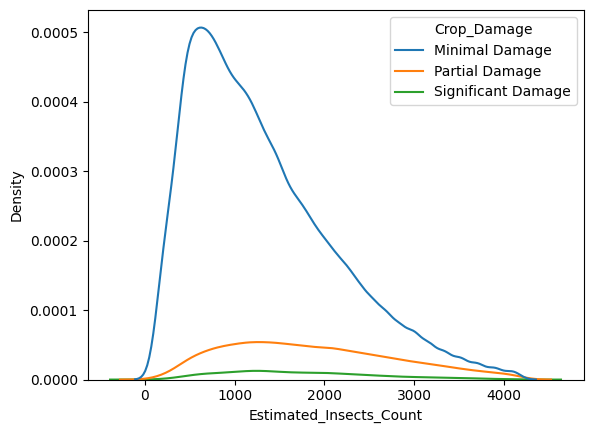

In [12]:
sns.kdeplot(data = df , x = 'Estimated_Insects_Count' , hue='Crop_Damage')

<Axes: xlabel='Crop_Type', ylabel='count'>

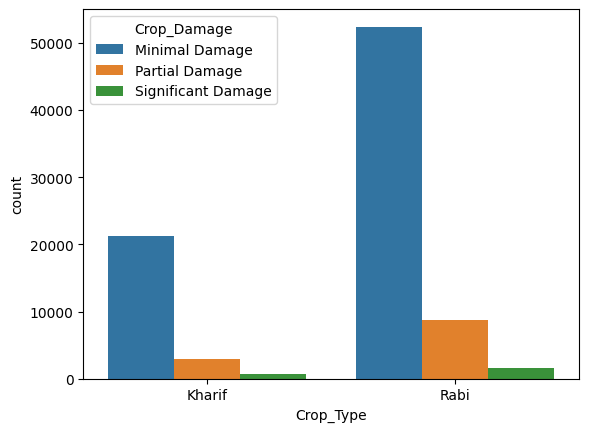

In [13]:
sns.countplot(data = df , x = 'Crop_Type' , hue='Crop_Damage')

<Axes: xlabel='Soil_Type', ylabel='count'>

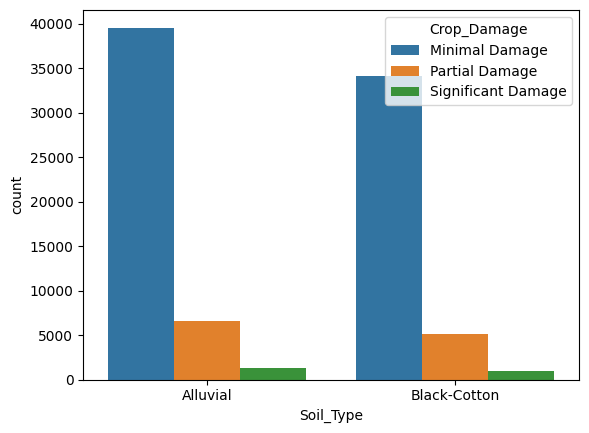

In [14]:
sns.countplot(data = df , x = 'Soil_Type' , hue='Crop_Damage')

<Axes: xlabel='Pesticide_Use_Category', ylabel='count'>

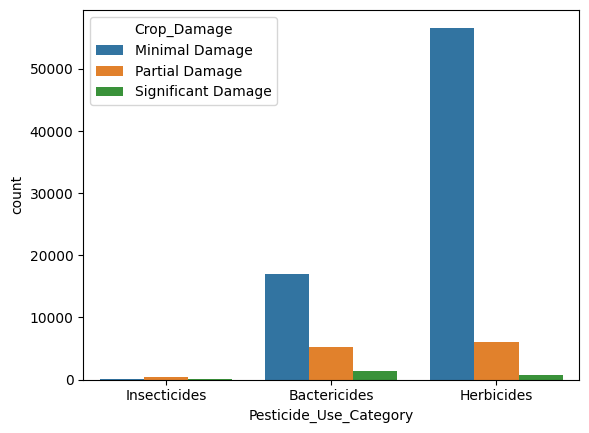

In [15]:
sns.countplot(data = df , x = 'Pesticide_Use_Category' , hue='Crop_Damage')

<Axes: xlabel='Season', ylabel='count'>

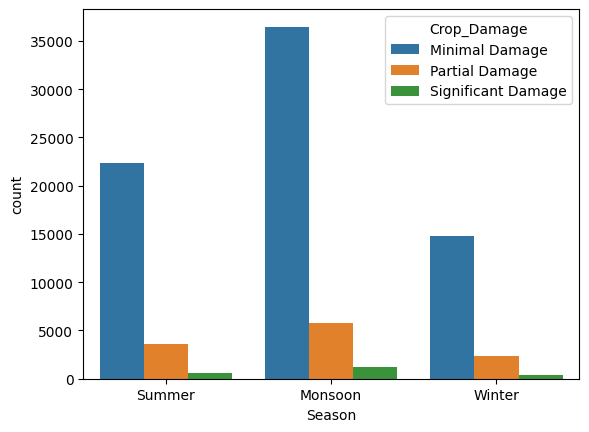

In [16]:
sns.countplot(data = df , x = 'Season' , hue='Crop_Damage')

**Splitting the Data**

In [17]:
X = df.drop('Crop_Damage' , axis=1)  #Input Vriable
y = df['Crop_Damage']                # target variable

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.25 , random_state=23)  #Splitting into train_test

In [18]:
X_test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
11500,283,Rabi,Black-Cotton,Herbicides,35,16,7,Monsoon
29513,915,Rabi,Black-Cotton,Herbicides,5,7,25,Monsoon
44282,1132,Rabi,Alluvial,Herbicides,40,40,6,Summer
80495,1385,Rabi,Black-Cotton,Herbicides,50,39,6,Summer
50188,1297,Rabi,Black-Cotton,Herbicides,30,30,7,Summer
...,...,...,...,...,...,...,...,...
12596,1678,Kharif,Alluvial,Herbicides,20,17,14,Monsoon
17836,151,Rabi,Black-Cotton,Bactericides,10,10,0,Winter
19826,2267,Rabi,Black-Cotton,Herbicides,45,42,13,Summer
40664,1785,Kharif,Alluvial,Herbicides,20,21,25,Winter


**Seprating Numerical and Categorical Colms**

In [19]:
cat_col = X_train.select_dtypes(include='object').columns
num_col = X_train.select_dtypes(exclude='object').columns

In [20]:
num_col

Index(['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit'],
      dtype='object')

In [21]:
cat_col

Index(['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season'], dtype='object')

**Encoding**

In [22]:
ordinal = OrdinalEncoder()
ordinal.fit(X_train[cat_col])

X_train[cat_col] = ordinal.transform(X_train[cat_col])
X_test[cat_col] = ordinal.transform(X_test[cat_col])

X_train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
21274,1296,1.0,0.0,1.0,40,40,0,2.0
25635,1385,1.0,1.0,0.0,30,41,0,1.0
19499,1056,1.0,1.0,1.0,30,17,26,1.0
39631,488,1.0,1.0,1.0,20,17,12,0.0
41872,1576,1.0,0.0,1.0,40,33,16,1.0
...,...,...,...,...,...,...,...,...
28288,2541,1.0,1.0,0.0,15,60,0,1.0
72585,790,1.0,1.0,1.0,20,32,10,1.0
9735,488,0.0,0.0,1.0,20,19,7,2.0
77704,851,1.0,1.0,1.0,15,23,19,0.0


**Model**

In [24]:
from mixed_naive_bayes import MixedNB

In [25]:
mix = MixedNB(categorical_features=[1,2,3,7])   #we have to provide categ_feat's index number
mix.fit(X_train , y_train)

TypeError: Expected y to contain only numerics, but got type object instead. For categorical variables, encode your data using sklearn's LabelEncoder.

In [ ]:
 #Its throughing an error becz our outplut variable is in categoric we need to encode in numeric 

In [26]:
lab = LabelEncoder()
lab.fit(y_train)
y_train = lab.transform(y_train)
y_test = lab.transform(y_test)

In [29]:
mix = MixedNB(categorical_features=[1,2,3,7])
mix.fit(X_train , y_train)
y_pred = mix.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
accuracy_score(y_test , y_pred)

0.8267756070841702

In [32]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     18382
           1       0.37      0.22      0.28      2941
           2       0.20      0.00      0.01       585

    accuracy                           0.83     21908
   macro avg       0.48      0.39      0.40     21908
weighted avg       0.78      0.83      0.80     21908



**AUC and ROC**

In [33]:
mix.predict_proba(X_test)

array([[9.71681681e-01, 2.49280747e-02, 3.39024437e-03],
       [9.73920047e-01, 2.59910051e-02, 8.89477572e-05],
       [8.90079976e-01, 9.35612423e-02, 1.63587819e-02],
       ...,
       [8.20660379e-01, 1.68731199e-01, 1.06084215e-02],
       [9.50242044e-01, 4.95544553e-02, 2.03500438e-04],
       [7.45492949e-01, 2.51565189e-01, 2.94186184e-03]])